# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

In [80]:
import plotly.express as px
from plotly import graph_objects

import yfinance as yf
import pandas as pd
import numpy as np

In [81]:
data_yf = yf.download(["NQ=F","^SPX","^DJI","BTC-USD"],
                      start="2020-01-01",
                      end="2024-08-01")

[*********************100%***********************]  4 of 4 completed


In [83]:
data_yf = data_yf.stack(future_stack=True).reset_index()
data_yf.head()

Price,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2020-01-01 00:00:00+00:00,BTC-USD,7200.174316,7200.174316,7254.330566,7174.944336,7194.89209,1.856566e+10
1,2020-01-01 00:00:00+00:00,NQ=F,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01 00:00:00+00:00,^DJI,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01 00:00:00+00:00,^SPX,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-02 00:00:00+00:00,BTC-USD,6985.470215,6985.470215,7212.155273,6935.270020,7202.55127,2.080208e+10


#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

In [94]:
data_yf["Volatilidade"] = data_yf['High'] - data_yf["Low"]

In [100]:
data_yf.head()

Price,Date,Ticker,Adj Close,Close,High,Low,Open,Volume,Volatilidade
0,2020-01-01 00:00:00+00:00,BTC-USD,7200.174316,7200.174316,7254.330566,7174.944336,7194.89209,1.856566e+10,79.386230
1,2020-01-01 00:00:00+00:00,NQ=F,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01 00:00:00+00:00,^DJI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01 00:00:00+00:00,^SPX,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-02 00:00:00+00:00,BTC-USD,6985.470215,6985.470215,7212.155273,6935.270020,7202.55127,2.080208e+10,276.885254


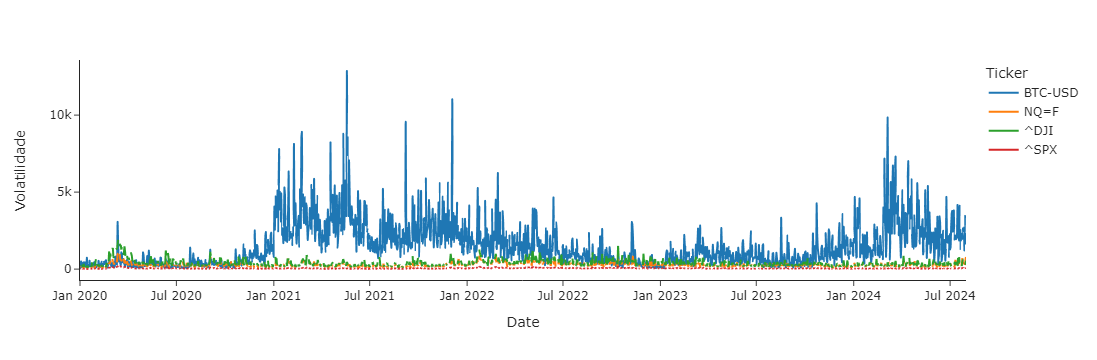

In [104]:
fig = px.line(data_frame=data_yf,x='Date',y='Volatilidade',color='Ticker',template='simple_white')
fig.show()

Sem dúvidas o bitcoin contém o maior nível de volatilidade. é muito fácil de percer esses níveis porque estão escancarados no gráfico. Também por ser uma classe de 'ativo' diferente, a movimentação também é diferente. 